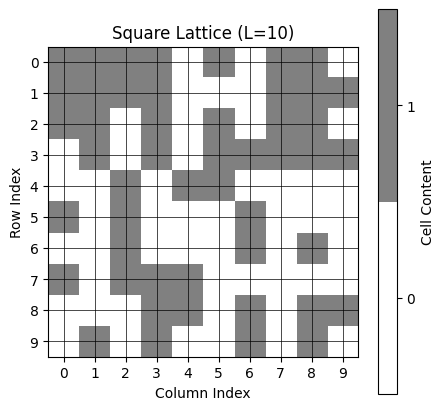

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Parameters
L = 10  # Size of the lattice (10x10)
p = 0.5  # Probability of a cell containing a dog
def save_array_to_file(array, filename):
    np.savetxt(filename, array, fmt='%d')
# Creating the lattice
np.random.seed(0)  # For reproducibility
lattice = np.random.choice([0, 1], size=(L, L), p=[1-p, p])

# Save array to file
save_array_to_file(lattice, 'lattice.txt')

# Plotting the lattice
cmap = mcolors.ListedColormap(['white', 'gray'])
plt.figure(figsize=(5, 5))
plt.imshow(lattice, cmap=cmap, aspect='equal')
plt.colorbar(ticks=[0, 1], label='Cell Content')
plt.clim(-0.5, 1.5)
plt.title('Square Lattice (L=10)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.xticks(range(L))
plt.yticks(range(L))
plt.grid(which='both', color='black', linewidth=0.5)
plt.show()

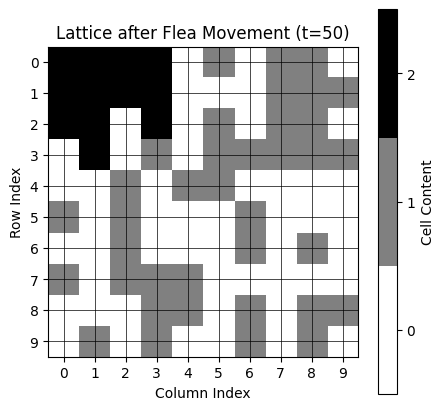

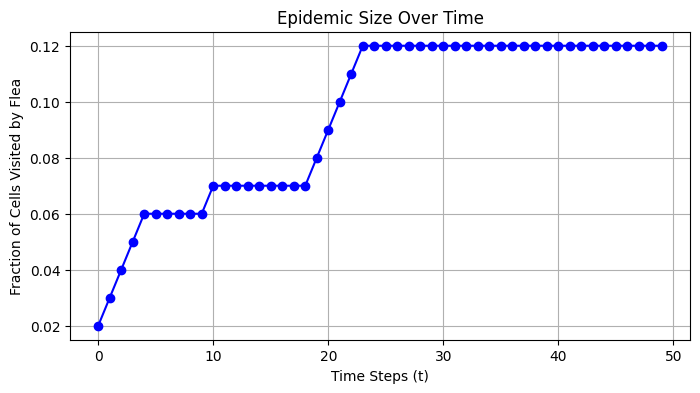

(array([[2, 2, 2, 2, 0, 1, 0, 1, 1, 0],
        [2, 2, 2, 2, 0, 0, 0, 1, 1, 1],
        [2, 2, 0, 2, 0, 1, 0, 1, 1, 0],
        [0, 2, 0, 1, 0, 1, 1, 1, 1, 1],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
        [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]]),
 [0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.06,
  0.06,
  0.06,
  0.06,
  0.06,
  0.07,
  0.07,
  0.07,
  0.07,
  0.07,
  0.07,
  0.07,
  0.07,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12,
  0.12])

In [ ]:
def get_adjacent_dogs(lattice, position):
    """
    Get the positions of adjacent cells that contain a dog (value 1).
    """
    L = lattice.shape[0]
    x, y = position
    adjacent_positions = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]  # Up, Down, Left, Right
    valid_positions = [(i, j) for i, j in adjacent_positions if 0 <= i < L and 0 <= j < L and lattice[i, j] == 1]
    return valid_positions

def simulate_flea_movement(lattice, t):
    """
    Simulate the flea's movement over the lattice for t time steps.
    """
    L = lattice.shape[0]
    epidemic_history = []

    # Find the starting point: the leftmost dog in the first row
    start_row = lattice[0]
    for i in range(L):
        if start_row[i] == 1:
            position = (0, i)
            break

    # Initialize the lattice with the flea's starting position
    flea_lattice = np.copy(lattice)
    flea_lattice[position] = 2  # Mark the starting position with '2'

    for _ in range(t):
        # Get valid adjacent positions
        valid_positions = get_adjacent_dogs(lattice, position)
        if not valid_positions:  # If no adjacent dogs, break the loop
            break

        # Randomly select the next position
        position = valid_positions[np.random.choice(len(valid_positions))]

        # Mark the new position with '2'
        flea_lattice[position] = 2

        # Record the fraction of cells visited by the flea
        epidemic_size = np.sum(flea_lattice == 2) / (L * L)
        epidemic_history.append(epidemic_size)

    return flea_lattice, epidemic_history

# Simulate the flea's movement
t = 50  # Number of time steps
flea_lattice, epidemic_history = simulate_flea_movement(lattice, t)

# Plotting the final lattice state
cmap = mcolors.ListedColormap(['white', 'gray', 'black'])
plt.figure(figsize=(5, 5))
plt.imshow(flea_lattice, cmap=cmap, aspect='equal')
plt.colorbar(ticks=[0, 1, 2], label='Cell Content')
plt.clim(-0.5, 2.5)
plt.title('Lattice after Flea Movement (t=50)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.xticks(range(L))
plt.yticks(range(L))
plt.grid(which='both', color='black', linewidth=0.5)
plt.show()

# Plotting the epidemic size over time
plt.figure(figsize=(8, 4))
plt.plot(range(t), epidemic_history, marker='o', linestyle='-', color='blue')
plt.title('Epidemic Size Over Time')
plt.xlabel('Time Steps (t)')
plt.ylabel('Fraction of Cells Visited by Flea')
plt.grid(True)
plt.show()

# Returning the final lattice state and epidemic history for further use
flea_lattice, epidemic_history

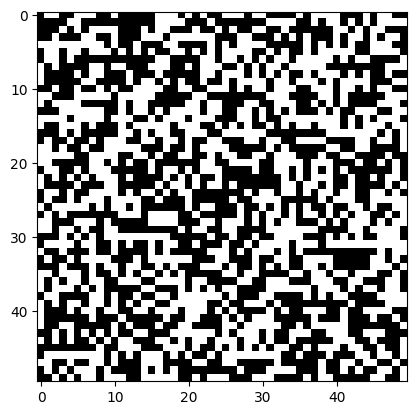

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to update the grid according to the rules of the Game of Life
def update_grid(grid):
    # Create a copy of the grid to hold the updated states
    new_grid = np.copy(grid)
    rows, cols = grid.shape

    # Iterate over each cell in the grid
    for i in range(rows):
        for j in range(cols):
            # Count the number of live neighbors for the current cell
            live_neighbors = np.sum(grid[max(0, i-1):min(rows, i+2), max(0, j-1):min(cols, j+2)]) - grid[i, j]

            # Apply the rules of the Game of Life
            if grid[i, j] == 1:
                if live_neighbors < 2 or live_neighbors > 3:
                    new_grid[i, j] = 0  # Cell dies
            else:
                if live_neighbors == 3:
                    new_grid[i, j] = 1  # Cell becomes alive

    return new_grid

# Function to initialize the grid with random values
def initialize_grid(rows, cols):
    return np.random.choice([0, 1], size=(rows, cols))

# Function to update the animation frames
def update(frameNum, img, grid):
    new_grid = update_grid(grid)
    img.set_data(new_grid)
    grid[:] = new_grid[:]
    return img,

# Main function to run the simulation
def main():
    # Set the size of the grid
    rows = 50
    cols = 50

    # Initialize the grid
    grid = initialize_grid(rows, cols)

    # Set up the animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='binary')
    ani = animation.FuncAnimation(fig, update, frames=100, fargs=(img, grid), interval=100)
    plt.show()

if __name__ == "__main__":
    main()
